In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

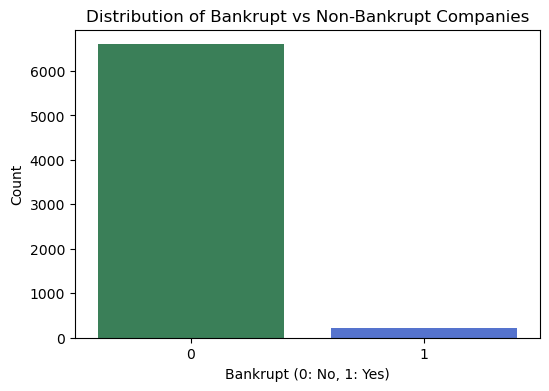

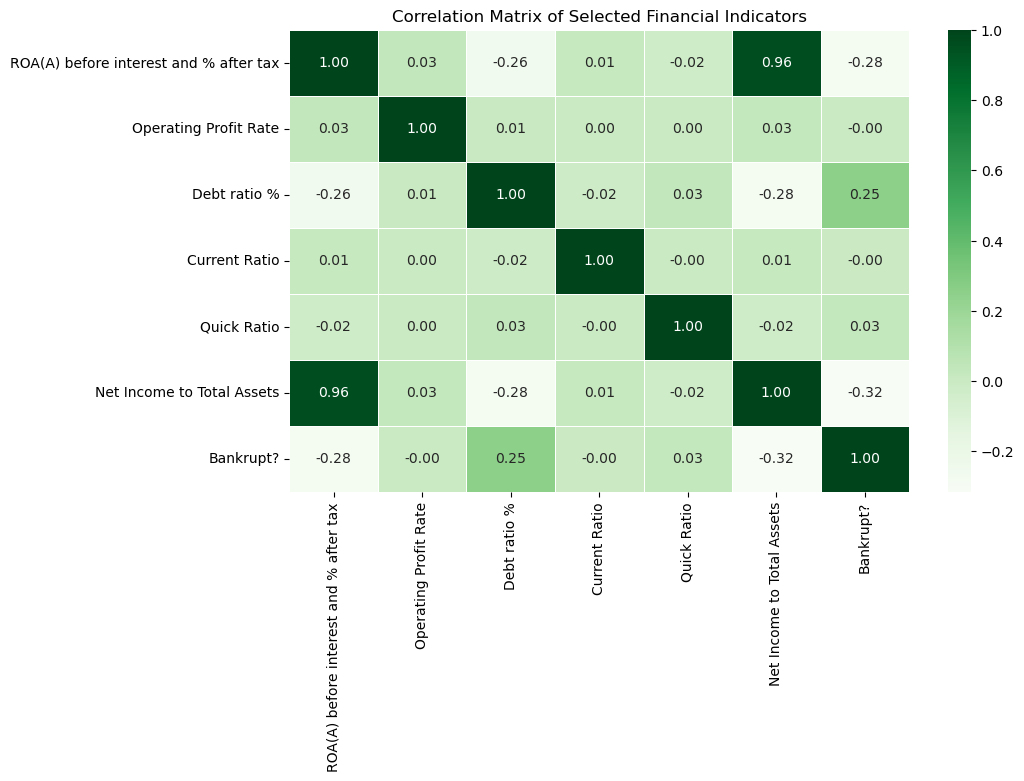

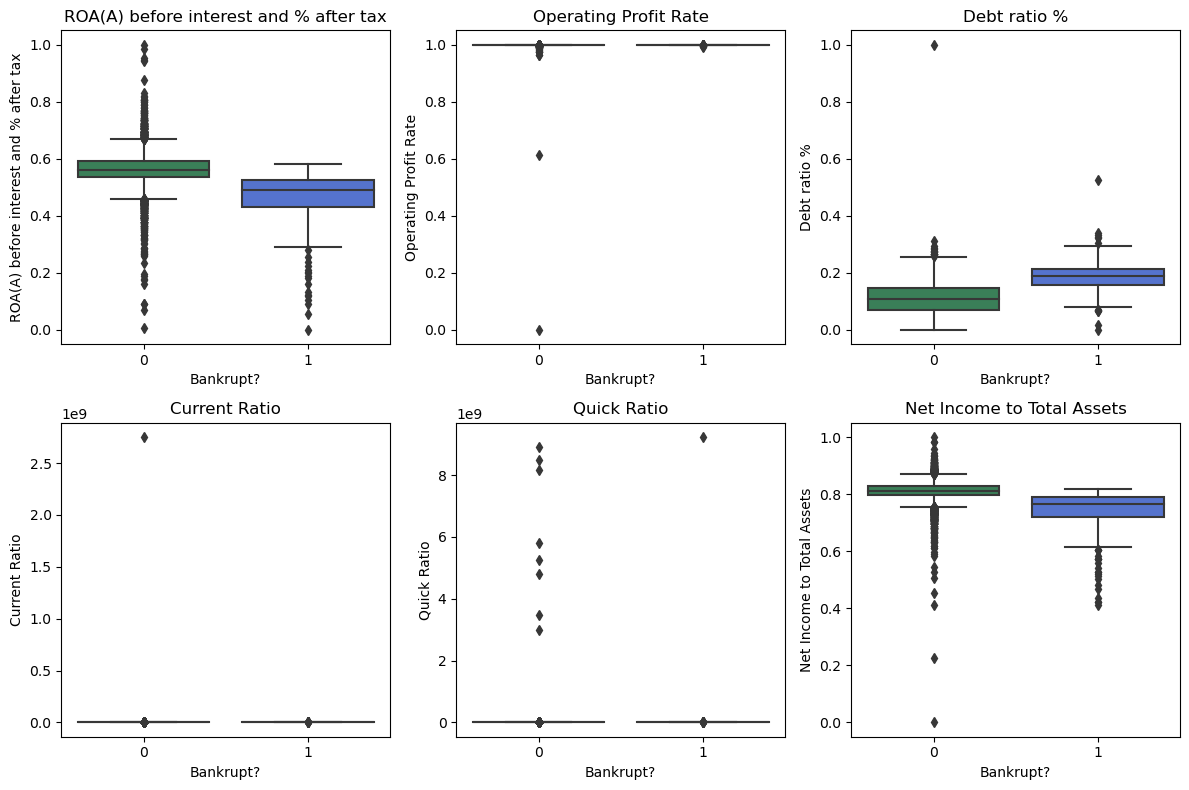

Random Forest Accuracy Score: 0.967741935483871
Random Forest Confusion Matrix:
 [[1313    7]
 [  37    7]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.50      0.16      0.24        44

    accuracy                           0.97      1364
   macro avg       0.74      0.58      0.61      1364
weighted avg       0.96      0.97      0.96      1364

Logistic Regression Accuracy Score: 0.9699413489736071
Logistic Regression Confusion Matrix:
 [[1315    5]
 [  36    8]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.62      0.18      0.28        44

    accuracy                           0.97      1364
   macro avg       0.79      0.59      0.63      1364
weighted avg       0.96      0.97      0.96      1364

SVM Accuracy Score: 0.9684750733137

In [13]:
df = pd.read_csv("/Users/jiminbyun/Downloads/data.csv")

df.columns = df.columns.str.strip()

df.info()

missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

plt.figure(figsize=(6,4))
sns.countplot(x=df["Bankrupt?"], palette=["seagreen", "royalblue"])
plt.xlabel("Bankrupt (0: No, 1: Yes)")
plt.ylabel("Count")
plt.title("Distribution of Bankrupt vs Non-Bankrupt Companies")
plt.show()

selected_features = ["ROA(A) before interest and % after tax", "Operating Profit Rate", 
                     "Debt ratio %", "Current Ratio", "Quick Ratio", "Net Income to Total Assets"]

df_selected = df[selected_features + ["Bankrupt?"]]

plt.figure(figsize=(10, 6))
sns.heatmap(df_selected.corr(), annot=True, fmt=".2f", cmap="Greens", linewidths=0.5)
plt.title("Correlation Matrix of Selected Financial Indicators")
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df["Bankrupt?"], y=df[feature], palette=["seagreen", "royalblue"])
    plt.title(feature)
plt.tight_layout()
plt.show()

X = df_selected.drop(columns=["Bankrupt?"])
y = df_selected["Bankrupt?"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

